In [1]:
import numpy as np
import pandas as pd


In [2]:
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html', True)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train=pd.read_csv("/home/pulkonet/Documents/DSG_Predictive Modelling/mushroom_train.csv")

In [5]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m


In [6]:
len(train)

5686

In [7]:
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Only two continuous variables

In [8]:
#storing categorical variables into a variable for easy usage
categorical_variable = train.dtypes[train.dtypes == 'object'].index.values

In [9]:
train[categorical_variable].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

veil-type isnt of any use, since it has same value in all rows

In [10]:
train['class'].value_counts()

e    2945
p    2741
Name: class, dtype: int64

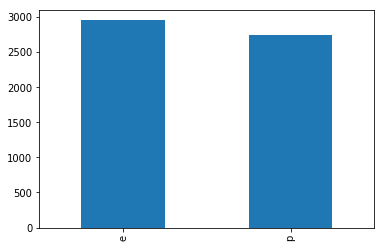

In [11]:
train['class'].value_counts().plot(kind='bar')

there is only one dependent variable, that is our class

In [12]:
dependent_var = 'class'

In [13]:
independent_var = [x for x in (train.columns) if x not in [dependent_var]]

In [14]:
independent_var

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'radius',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'weight',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

categorical variables are objects and must be converted into numbers for fitting into our model

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [16]:
for a in categorical_variable:
    train[a] = LE.fit_transform(train[a])

In [17]:
train.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.042155,0.176899,-0.018315,-0.502157,-0.091765,0.119715,-0.348396,0.539296,-0.531714,-0.110221,-0.369834,0.051789,-0.339821,-0.303188,-0.141789,-0.140983,NaN,0.139915,0.007413,-0.217923,-0.413472,0.164303,0.292035,0.216358
cap-shape,0.042155,1.000000,-0.050507,-0.049525,-0.028575,-0.021651,0.073417,-0.001366,0.046013,-0.006245,0.065408,0.041449,-0.028290,-0.029756,-0.031333,-0.035038,-0.029181,NaN,0.064026,0.015889,-0.123694,-0.026889,-0.084278,0.070923,-0.042490
cap-surface,0.176899,-0.050507,1.000000,-0.023641,0.066776,0.051636,-0.033450,-0.274616,0.207781,-0.167356,-0.012494,-0.124124,0.010855,0.082593,0.099681,0.070571,0.063991,NaN,-0.013444,-0.010072,-0.023283,-0.113144,0.231465,0.012944,0.158039
cap-color,-0.018315,-0.049525,-0.023641,1.000000,-0.011004,-0.384536,0.041425,0.149580,-0.164310,0.079571,-0.455951,0.310565,-0.041630,-0.061341,-0.061882,-0.000779,-0.004182,NaN,0.037910,0.003412,0.000711,0.153141,-0.284759,-0.153048,0.038552
bruises,-0.502157,-0.028575,0.066776,-0.011004,1.000000,-0.055836,0.132196,-0.299498,-0.365449,0.526684,0.104269,0.244906,-0.041373,0.461709,0.459844,0.071998,0.088409,NaN,0.113148,-0.012115,0.049784,0.693615,-0.284631,0.082524,-0.078090
odor,-0.091765,-0.021651,0.051636,-0.384536,-0.055836,1.000000,-0.054703,0.065724,0.319945,-0.128353,0.458874,-0.205695,0.028405,0.127045,0.074021,0.175100,0.178315,NaN,-0.052985,0.010299,0.112166,-0.277452,0.473380,-0.047982,-0.033562
gill-attachment,0.119715,0.073417,-0.033450,0.041425,0.132196,-0.054703,1.000000,0.068124,0.103890,-0.124812,0.177779,0.134268,-0.045920,-0.081394,-0.112935,0.097695,0.093831,NaN,0.894226,0.016178,0.095721,-0.138358,-0.029423,0.169458,-0.027452
gill-spacing,-0.348396,-0.001366,-0.274616,0.149580,-0.299498,0.065724,0.068124,1.000000,-0.105925,0.103402,0.070504,0.338643,-0.028612,-0.201880,-0.205091,0.276282,0.253343,NaN,0.074113,0.002415,0.251853,-0.189465,0.060826,-0.527422,-0.149350
gill-size,0.539296,0.046013,0.207781,-0.164310,-0.365449,0.319945,0.103890,-0.105925,1.000000,-0.515428,0.208756,-0.333757,0.032306,0.055582,0.013449,0.300321,0.284636,NaN,0.101500,0.017982,-0.175917,-0.460385,0.619809,0.136891,0.160517
gill-color,-0.531714,-0.006245,-0.167356,0.079571,0.526684,-0.128353,-0.124812,0.103402,-0.515428,1.000000,-0.168804,0.311865,-0.027378,0.225269,0.261116,-0.064780,-0.080552,NaN,-0.092610,-0.008161,0.097492,0.624766,-0.408625,-0.033504,-0.206406


In [18]:
from sklearn import tree


In [19]:
clf=tree.DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import train_test_split
train1, test = train_test_split(train, test_size=.2, stratify=train['class'])
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
697,1,5,2,0,1,2,1,0,0,7,1,1,25,2,2,7,7,0,2,32,1,4,1,3,5
934,1,5,3,4,0,2,1,0,1,0,1,0,50,1,1,7,6,0,2,23,1,0,7,4,0
5553,1,5,0,3,0,1,1,0,1,9,0,1,152,2,2,7,7,0,2,27,1,4,3,3,0
4637,1,2,2,2,0,2,1,0,1,0,1,0,108,2,2,6,6,0,2,44,1,0,7,4,0
5436,1,5,2,0,1,2,1,0,0,10,1,1,121,2,2,7,7,0,2,25,1,4,1,4,1


In [21]:
len(test)

1138

In [22]:
len(train1)

4548

In [23]:
clf=clf.fit(train1[independent_var],train1[dependent_var])

In [24]:
prediction1=clf.predict(test[independent_var])

In [25]:
prediction1

array([1, 1, 1, ..., 1, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(prediction1,test['class'])

1.0

huh? haha

lets check with another model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model2 = LogisticRegression()

In [30]:
train1, test = train_test_split(train, test_size=.2, stratify=train['class'])
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
2819,0,2,3,2,1,5,1,0,0,10,1,1,288,2,2,3,7,0,2,28,1,4,3,5,0
157,0,2,3,5,1,5,1,0,0,10,0,0,3,2,2,7,2,0,2,26,2,0,7,1,6
1198,1,5,3,2,0,7,1,0,1,0,1,0,351,2,2,6,7,0,2,61,1,0,7,4,4
2924,1,3,2,2,0,2,1,0,1,0,1,0,358,1,1,6,6,0,2,59,1,0,7,4,2
5569,0,5,3,4,1,0,1,0,0,5,0,4,69,2,3,7,7,0,2,25,1,4,2,3,4


In [31]:
model2.fit(train1[independent_var],train1[dependent_var])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
prediction2=model2.predict(test[independent_var])

In [33]:
accuracy_score(prediction2, test['class'])

0.95166959578207377

# Prediction Of Mushroom Test

In [34]:
test_data=pd.read_csv("/home/pulkonet/Documents/DSG_Predictive Modelling/mushroom_test.csv")

In [35]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m


In [37]:
test_data.shape

(2438, 24)

In [38]:
len(test_data)

2438

In [41]:
categorical_variable_test = test_data.dtypes[test_data.dtypes == 'object'].index.values

In [42]:
test_data[categorical_variable_test].apply(lambda x: len(x.unique()))

cap-shape                    5
cap-surface                  3
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       8
stalk-color-below-ring       9
veil-type                    1
veil-color                   3
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [43]:
for a in categorical_variable_test:
    test_data[a] = LE.fit_transform(test_data[a])

In [44]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3


In [45]:
prediction =clf.predict(test_data)

In [46]:
prediction

array([0, 1, 0, ..., 1, 1, 0])

In [47]:
test_data['class'] = prediction

In [48]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,4,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0,0
1,4,2,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0,1
2,0,1,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3,0
3,1,2,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0,1
4,0,2,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3,0
